In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive, drift, mean, seasonal_naive)
import seaborn as sns; sns.set()
from sklearn.preprocessing import Normalizer
from operator import add

data_pm10 = pd.read_csv('pm10.csv')
data_no2 = pd.read_csv('NO2.csv')
print(len(data_no2))
data_pm10.head(10)

2927


,Stazione,Data inizio,Data fine,Strumento,PM10,Unità di misura,F1,F2,F3,F4
0,DE AMICIS,31/12/2019,01/01/2020,FAI SWAM 5A,42.0,ug/m3,NaN,1.0,1,1
1,DE AMICIS,01/01/2020,02/01/2020,FAI SWAM 5A,39.0,ug/m3,NaN,NaN,1,1
2,DE AMICIS,02/01/2020,03/01/2020,FAI SWAM 5A,49.0,ug/m3,NaN,NaN,1,1
3,DE AMICIS,03/01/2020,04/01/2020,FAI SWAM 5A,44.0,ug/m3,NaN,NaN,1,1
4,DE AMICIS,04/01/2020,05/01/2020,FAI SWAM 5A,27.0,ug/m3,NaN,NaN,1,1
5,DE AMICIS,05/01/2020,06/01/2020,FAI SWAM 5A,28.0,ug/m3,NaN,NaN,1,1
6,DE AMICIS,06/01/2020,07/01/2020,FAI SWAM 5A,18.0,ug/m3,NaN,NaN,1,1
7,DE AMICIS,07/01/2020,08/01/2020,FAI SWAM 5A,53.0,ug/m3,NaN,NaN,1,1
8,DE AMICIS,08/01/2020,09/01/2020,FAI SWAM 5A,52.0,ug/m3,NaN,NaN,1,1
9,DE AMICIS,09/01/2020,10/01/2020,FAI SWAM 5A,45.0,ug/m3,NaN,NaN,1,1


In [36]:
data_no2.head(10)

,Stazione,Data inizio,Data fine,Strumento,NO2 (Biossido di azoto),Unità di misura,F1,F2,F3,F4
0,DE AMICIS,31/12/2019 23.00.00,01/01/2020,API 200E,16.0,ug/m3,NaN,1.0,1.0,1
1,DE AMICIS,01/01/2020,01/01/2020 1.00.00,API 200E,26.0,ug/m3,NaN,NaN,1.0,1
2,DE AMICIS,01/01/2020 1.00.00,01/01/2020 2.00.00,API 200E,25.0,ug/m3,NaN,NaN,1.0,1
3,DE AMICIS,01/01/2020 2.00.00,01/01/2020 3.00.00,API 200E,24.0,ug/m3,NaN,NaN,1.0,1
4,DE AMICIS,01/01/2020 3.00.00,01/01/2020 4.00.00,API 200E,32.0,ug/m3,NaN,NaN,1.0,1
5,DE AMICIS,01/01/2020 4.00.00,01/01/2020 5.00.00,API 200E,21.0,ug/m3,NaN,NaN,1.0,1
6,DE AMICIS,01/01/2020 5.00.00,01/01/2020 6.00.00,API 200E,18.0,ug/m3,NaN,NaN,1.0,1
7,DE AMICIS,01/01/2020 6.00.00,01/01/2020 7.00.00,API 200E,26.0,ug/m3,NaN,NaN,1.0,1
8,DE AMICIS,01/01/2020 7.00.00,01/01/2020 8.00.00,API 200E,29.0,ug/m3,NaN,NaN,1.0,1
9,DE AMICIS,01/01/2020 8.00.00,01/01/2020 9.00.00,API 200E,29.0,ug/m3,NaN,NaN,1.0,1


In [37]:
data_no2 = data_no2.iloc[::12, :]
data_no2 = data_no2.fillna(method='ffill')
len(data_no2)

244

In [38]:
#data_pm10 = data_pm10.set_index('Data fine')
data_pm10 = data_pm10.fillna(method='ffill')
#data_no2 = data_no2.set_index('Data fine')

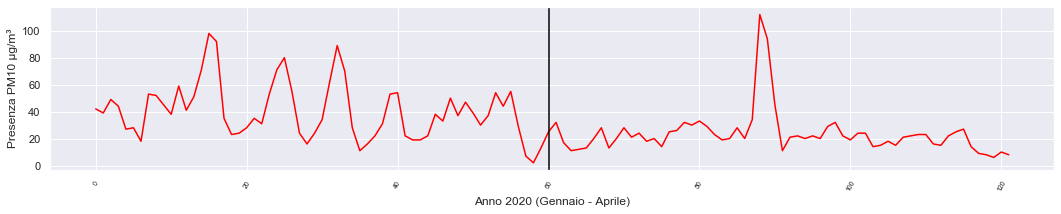

In [39]:
plt.figure(figsize = (18, 3))
plt.plot(data_pm10['PM10'], color = "red")
plt.axvline(x=60, color = "black")
plt.xlabel('Anno 2020 (Gennaio - Aprile)', fontsize=12)
plt.ylabel('Presenza PM10 µg/m³',  fontsize=12)
plt.xticks(rotation=60, fontsize=7)
plt.show()

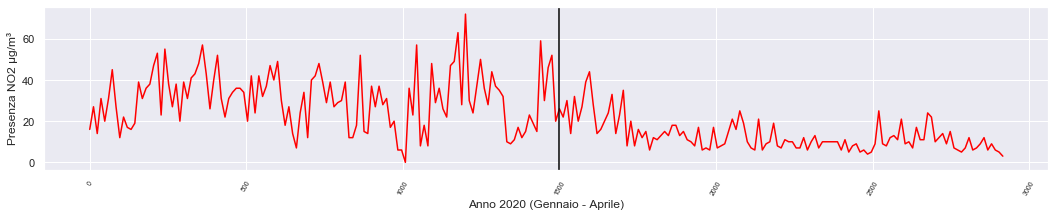

In [40]:

plt.figure(figsize = (18, 3))
plt.plot(data_no2['NO2 (Biossido di azoto)'], color = "red")
plt.axvline(x=1500, color = "black")
plt.xlabel('Anno 2020 (Gennaio - Aprile)', fontsize=12)
plt.ylabel('Presenza NO2 µg/m³',  fontsize=12)
plt.xticks(rotation=60, fontsize=7)
plt.show()

### Confronto dati tra traffico e inquinamento

In [41]:
zdata = pd.read_csv('zdata.csv')
zdata.head()

,Day,base2mid,Z.Totale
0,2020-01-01,Bologna,0.558516
1,2020-01-01,Ferrara,0.643222
2,2020-01-01,Forli'-Cesena,0.784004
3,2020-01-01,Modena,0.545689
4,2020-01-01,Parma,0.560193


In [42]:
agg_by_province = zdata.groupby(by = ['base2mid'])
for i, k in agg_by_province: 
    print(i, k)

Bologna             Day base2mid  Z.Totale
0    2020-01-01  Bologna  0.558516
9    2020-01-02  Bologna  0.812789
18   2020-01-03  Bologna  0.898452
27   2020-01-04  Bologna  0.834038
36   2020-01-05  Bologna  0.738255
..          ...      ...       ...
774  2020-03-27  Bologna  0.275517
783  2020-03-28  Bologna  0.130389
792  2020-03-29  Bologna  0.050407
801  2020-03-30  Bologna  0.290858
810  2020-03-31  Bologna  0.288367

[91 rows x 3 columns]
Ferrara             Day base2mid  Z.Totale
1    2020-01-01  Ferrara  0.643222
10   2020-01-02  Ferrara  0.883729
19   2020-01-03  Ferrara  0.919968
28   2020-01-04  Ferrara  0.871499
37   2020-01-05  Ferrara  0.812892
..          ...      ...       ...
775  2020-03-27  Ferrara  0.346398
784  2020-03-28  Ferrara  0.172844
793  2020-03-29  Ferrara  0.064501
802  2020-03-30  Ferrara  0.362325
811  2020-03-31  Ferrara  0.356896

[91 rows x 3 columns]
Forli'-Cesena             Day       base2mid  Z.Totale
2    2020-01-01  Forli'-Cesena  0.784004
11

In [59]:
Piacenza = pd.read_csv('inquinamento/NO2/Piacenza.csv')
Bologna = pd.read_csv('inquinamento/NO2/Bologna.csv')
ReggioEmilia = pd.read_csv('inquinamento/NO2/ReggioEmilia.csv')
Modena = pd.read_csv('inquinamento/NO2/Modena.csv')
Parma = pd.read_csv('inquinamento/NO2/Parma.csv')
Rimini = pd.read_csv('inquinamento/NO2/Rimini.csv')
Forli = pd.read_csv('inquinamento/NO2/ForliCesena.csv')
Ravenna = pd.read_csv('inquinamento/NO2/ForliCesena.csv')
Ferrara = pd.read_csv('inquinamento/NO2/Ferrara.csv')
province = {'Bologna': Bologna, 
             'Ferrara': Ferrara, 
             'Forli\'-Cesena':Forli, 
             'Modena':Modena, 
             'Parma':Parma, 
             'Piacenza':Piacenza, 
             'Ravenna':Ravenna, 
             'Reggio nell\'Emilia':ReggioEmilia, 
             'Rimini':Rimini}

In [60]:
Ferrara.head(2)

,Stazione,Data inizio,Data fine,Strumento,NO2 (Biossido di azoto),Unità di misura,F1,F2,F3,F4
0,VILLA FULVIA,30/12/2019 23.00.00,31/12/2019,API 200E,43.0,ug/m3,NaN,1.0,1,1
1,VILLA FULVIA,31/12/2019,31/12/2019 1.00.00,API 200E,39.0,ug/m3,NaN,1.0,1,1


Bologna - CASTELLUCCIO ==> Pearson correlation, p-value (0.2713307977124546, 0.009280405670061128)


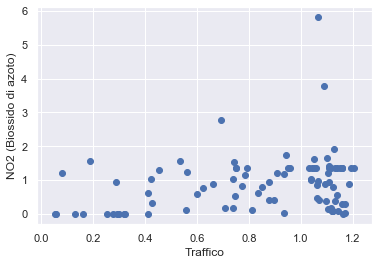

---------------
Bologna - DE AMICIS ==> Pearson correlation, p-value (0.5015161532571333, 4.107562022517198e-07)


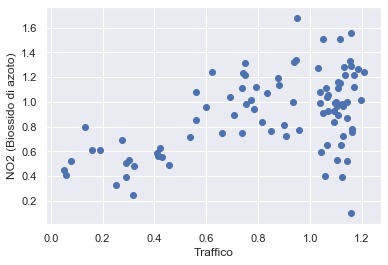

---------------
Bologna - GIARDINI MARGHERITA ==> Pearson correlation, p-value (0.5947194285364832, 5.104652159146729e-10)


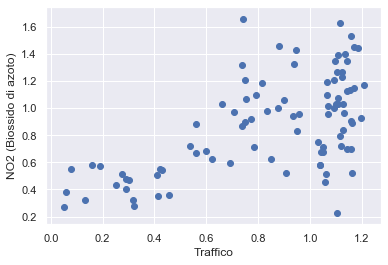

---------------
---------------
Bologna - SAN LAZZARO ==> Pearson correlation, p-value (0.5600955658472355, 7.808155126208884e-09)


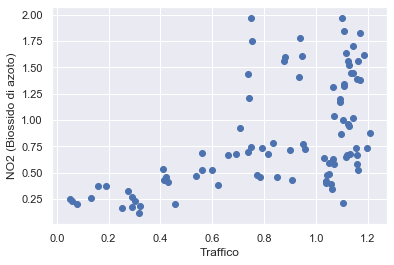

---------------
Bologna - SAN PIETRO CAPOFIUME ==> Pearson correlation, p-value (0.45913544984363025, 4.7035577167597425e-06)


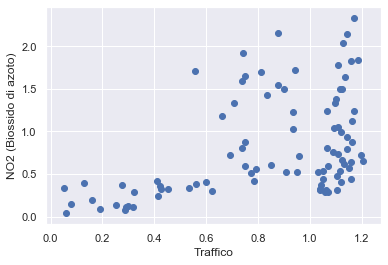

---------------
Bologna - VIA CHIARINI ==> Pearson correlation, p-value (0.6694916562129067, 4.010554102477212e-13)


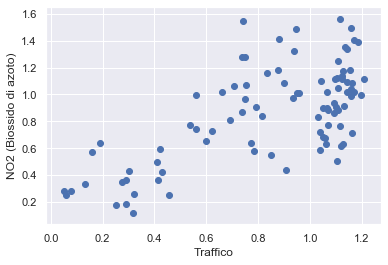

---------------
Ferrara - CENTO ==> Pearson correlation, p-value (0.5667395340296282, 4.739830928931438e-09)


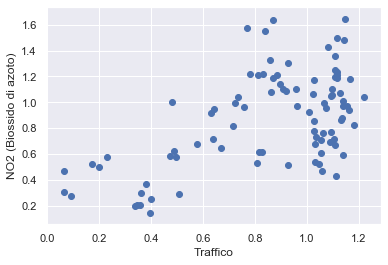

---------------
Ferrara - GHERARDI ==> Pearson correlation, p-value (0.424199877474194, 2.785367635806157e-05)


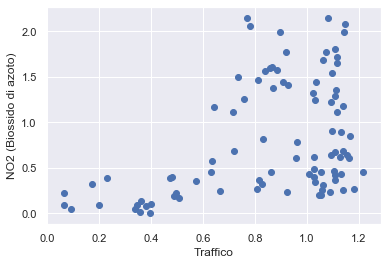

---------------
Ferrara - ISONZO ==> Pearson correlation, p-value (0.6239036723472562, 3.930542300324794e-11)


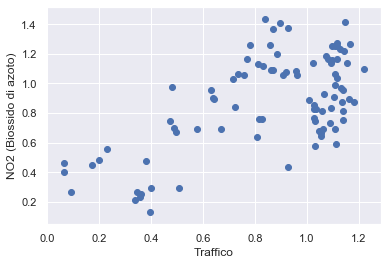

---------------
Ferrara - OSTELLATO ==> Pearson correlation, p-value (0.41503637847922126, 4.303253989399831e-05)


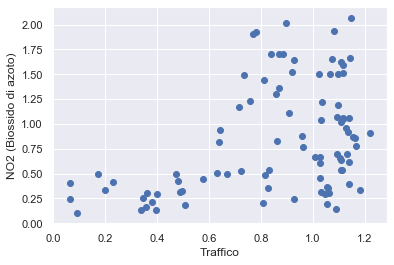

---------------
Ferrara - VILLA FULVIA ==> Pearson correlation, p-value (0.5581160960718682, 9.041074680286377e-09)


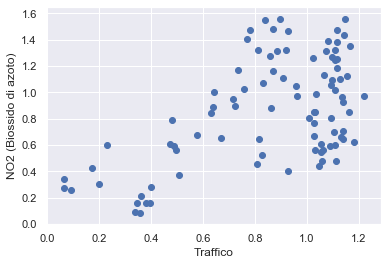

---------------
Forli'-Cesena - FRANCHINI-ANGELONI ==> Pearson correlation, p-value (0.730153758980522, 2.1775742168151942e-16)


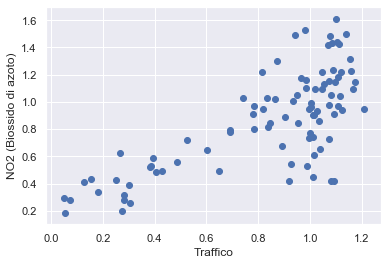

---------------
Forli'-Cesena - PARCO RESISTENZA ==> Pearson correlation, p-value (0.6601294414623413, 1.0969513526657386e-12)


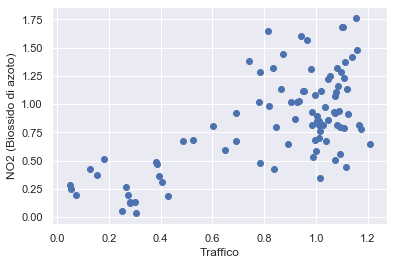

---------------
---------------
Forli'-Cesena - SAVIGNANO ==> Pearson correlation, p-value (0.6600682268038682, 1.1040624777233254e-12)


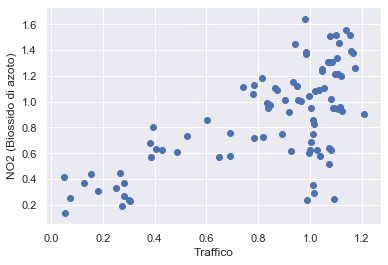

---------------
Forli'-Cesena - SAVIGNANO DI RIGO ==> Pearson correlation, p-value (0.2882182952332596, 0.005597551911324353)


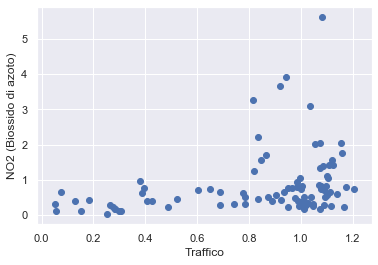

---------------
Modena - GIARDINI ==> Pearson correlation, p-value (0.6579164154681136, 1.3842947010110359e-12)


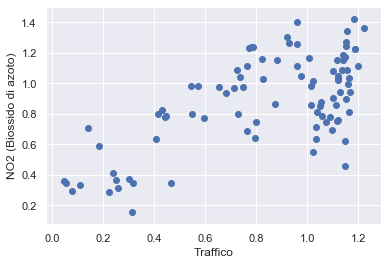

---------------
Modena - REMESINA ==> Pearson correlation, p-value (0.7191068554846589, 9.906951689474917e-16)


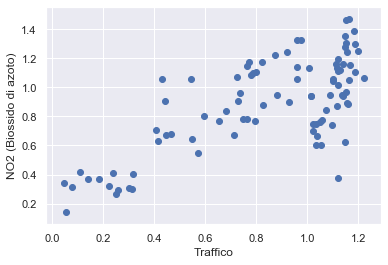

---------------
Modena - SAN FRANCESCO ==> Pearson correlation, p-value (0.7235493207151709, 5.434453066736765e-16)


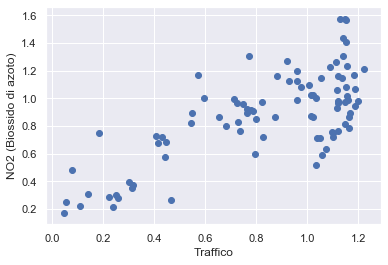

---------------
Parma - BADIA ==> Pearson correlation, p-value (0.5406657874605135, 3.162044550842028e-08)


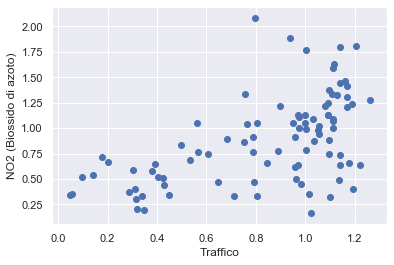

---------------
Parma - CITTADELLA ==> Pearson correlation, p-value (0.6764461404861791, 1.8546603704107056e-13)


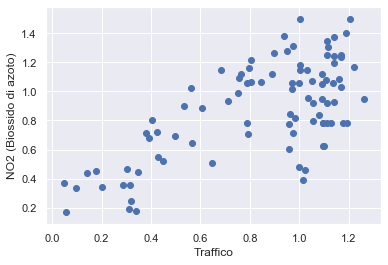

---------------
Parma - MONTEBELLO ==> Pearson correlation, p-value (0.7155793755800517, 1.5829961061042637e-15)


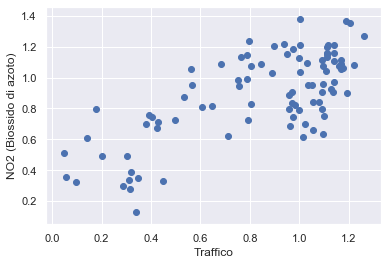

---------------
Parma - SARAGAT ==> Pearson correlation, p-value (0.7542657788292971, 6.066260894242977e-18)


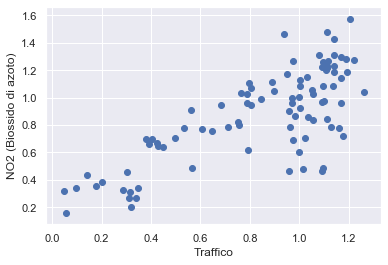

---------------
Piacenza - BESENZONE ==> Pearson correlation, p-value (0.6319434683346916, 1.8493176352386263e-11)


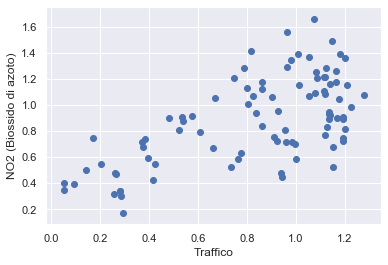

---------------
---------------
Piacenza - GIORDANI-FARNESE ==> Pearson correlation, p-value (0.6204359044236402, 5.405182534413232e-11)


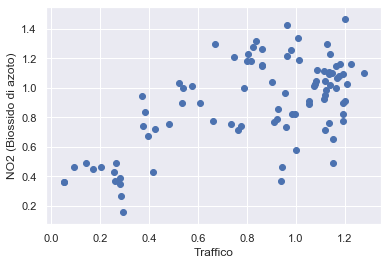

---------------
Piacenza - LUGAGNANO ==> Pearson correlation, p-value (0.5890216846955607, 8.176039365620991e-10)


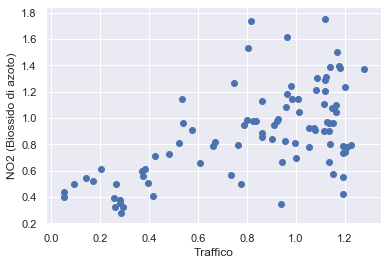

---------------
Ravenna - FRANCHINI-ANGELONI ==> Pearson correlation, p-value (0.7140967122950599, 1.923614615932725e-15)


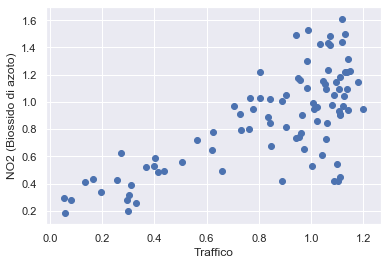

---------------
Ravenna - PARCO RESISTENZA ==> Pearson correlation, p-value (0.6533895821169977, 2.2146755686475206e-12)


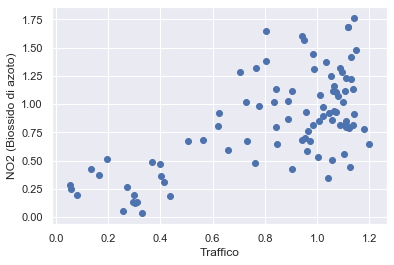

---------------
---------------
Ravenna - SAVIGNANO ==> Pearson correlation, p-value (0.6398054442054122, 8.659650374054828e-12)


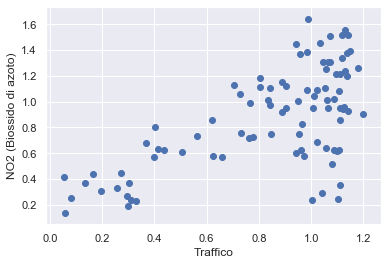

---------------
Ravenna - SAVIGNANO DI RIGO ==> Pearson correlation, p-value (0.2653130889266796, 0.011032650339970841)


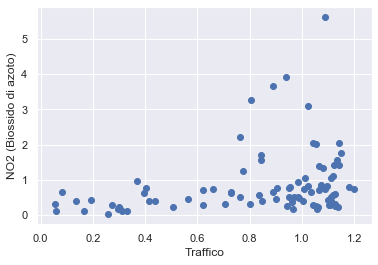

---------------
Reggio nell'Emilia - CASTELLARANO ==> Pearson correlation, p-value (0.7506497461666152, 1.065046030998026e-17)


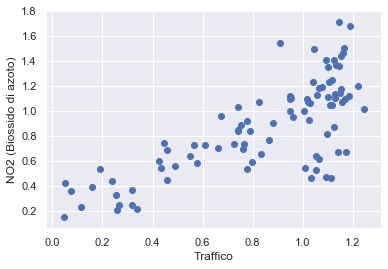

---------------
Reggio nell'Emilia - S. LAZZARO ==> Pearson correlation, p-value (0.6806266079999566, 1.1548141390275245e-13)


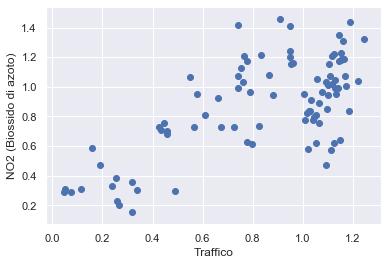

---------------
Reggio nell'Emilia - S. ROCCO ==> Pearson correlation, p-value (0.5869173648888576, 9.707320770591514e-10)


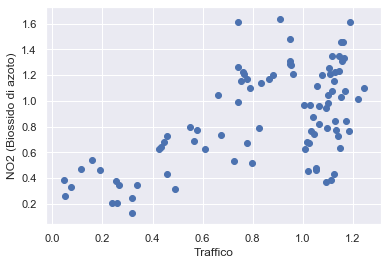

---------------
Reggio nell'Emilia - TIMAVO ==> Pearson correlation, p-value (0.6428602562304166, 6.4106215583895975e-12)


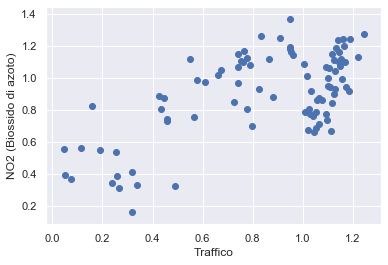

---------------
Rimini - FLAMINIA ==> Pearson correlation, p-value (0.6836613185606515, 8.147336321020942e-14)


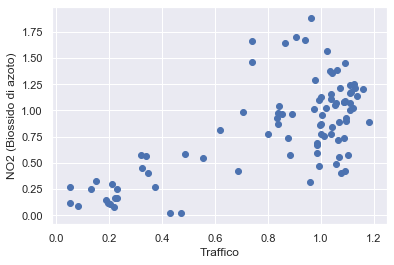

---------------
Rimini - MARECCHIA ==> Pearson correlation, p-value (0.5507558083788181, 1.5465429635701252e-08)


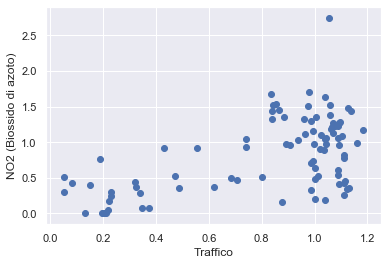

---------------
---------------
Rimini - SAN LEO ==> Pearson correlation, p-value (0.055699596240070544, 0.599998624923005)


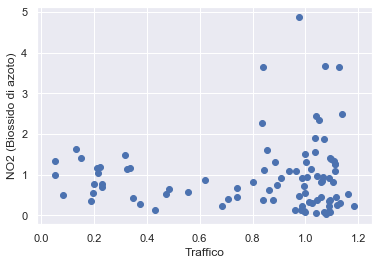

---------------
Rimini - VERUCCHIO ==> Pearson correlation, p-value (0.5589623242288508, 8.492806000495706e-09)


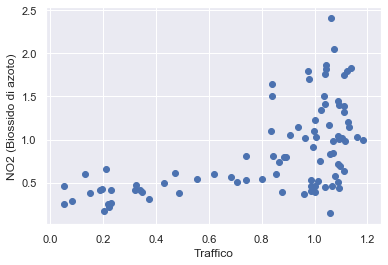

---------------


In [45]:
corr_per_città_stazione = {}
for i, k in agg_by_province: 
    provincia_i = i
    df_provincia_i = province[provincia_i]
    agg_by_stz = df_provincia_i.groupby(by = ['Stazione'])
    for j, m in agg_by_stz:
        #m = m.drop(m.index[:24])
        m = m.fillna(method='bfill')
        m = m.rolling(24).mean()
        m = m.fillna(method='bfill')
        m = m.fillna(method='ffill')
        m = m.iloc[::24,:]
        #print(i, len(k))
        #print(j, len(m))
        if len(m)> len(k):
            diff = len(m)-len(k)
            m = m[diff:]
            #print('new m length ', len(m))
        if len(k) == len(m):
            città = k['Z.Totale'].values
            stazione = m['NO2 (Biossido di azoto)'].values
            mean_stazione = np.mean(stazione[:69])
            normal_stz = stazione / mean_stazione
            #norm_stz = np.linalg.norm(stazione)
            #normal_stz = stazione/norm_stz
            corr = scipy.stats.pearsonr(città, normal_stz)
            print(str(i)+" - "+str(j)+' ==> Pearson correlation, p-value '+str(corr))
            plt.figure(figsize = (6,4))
            plt.scatter(città, normal_stz)
            plt.xlabel('Traffico')
            plt.ylabel('NO2 (Biossido di azoto)')
            plt.show()
            
            città_stazione = i+"    ==>    "+i+"_"+j
            corr_per_città_stazione[città_stazione] = corr
           
        print('---------------')

In [46]:
corr_per_città_stazione

{'Bologna    ==>    Bologna_CASTELLUCCIO': (0.2713307977124546,
  0.009280405670061128),
 'Bologna    ==>    Bologna_DE AMICIS': (0.5015161532571333,
  4.107562022517198e-07),
 'Bologna    ==>    Bologna_GIARDINI MARGHERITA': (0.5947194285364832,
  5.104652159146729e-10),
 'Bologna    ==>    Bologna_SAN LAZZARO': (0.5600955658472355,
  7.808155126208884e-09),
 'Bologna    ==>    Bologna_SAN PIETRO CAPOFIUME': (0.45913544984363025,
  4.7035577167597425e-06),
 'Bologna    ==>    Bologna_VIA CHIARINI': (0.6694916562129067,
  4.010554102477212e-13),
 'Ferrara    ==>    Ferrara_CENTO': (0.5667395340296282,
  4.739830928931438e-09),
 'Ferrara    ==>    Ferrara_GHERARDI': (0.424199877474194,
  2.785367635806157e-05),
 'Ferrara    ==>    Ferrara_ISONZO': (0.6239036723472562,
  3.930542300324794e-11),
 'Ferrara    ==>    Ferrara_OSTELLATO': (0.41503637847922126,
  4.303253989399831e-05),
 'Ferrara    ==>    Ferrara_VILLA FULVIA': (0.5581160960718682,
  9.041074680286377e-09),
 "Forli'-Cesena   

In [47]:
correlations = []
città_Stz = []

for k, v in corr_per_città_stazione.items(): 
    #print(type(k), type(v))
    correlations.append(v[0])
    città_Stz.append(k)
   

### Histogramma delle correlazioni.

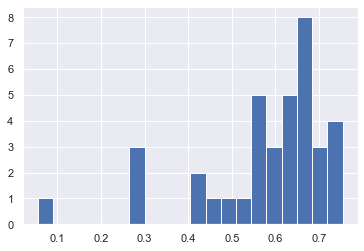

In [48]:
plt.hist(correlations, bins = 20)
plt.show()

### Barplot correlazioni

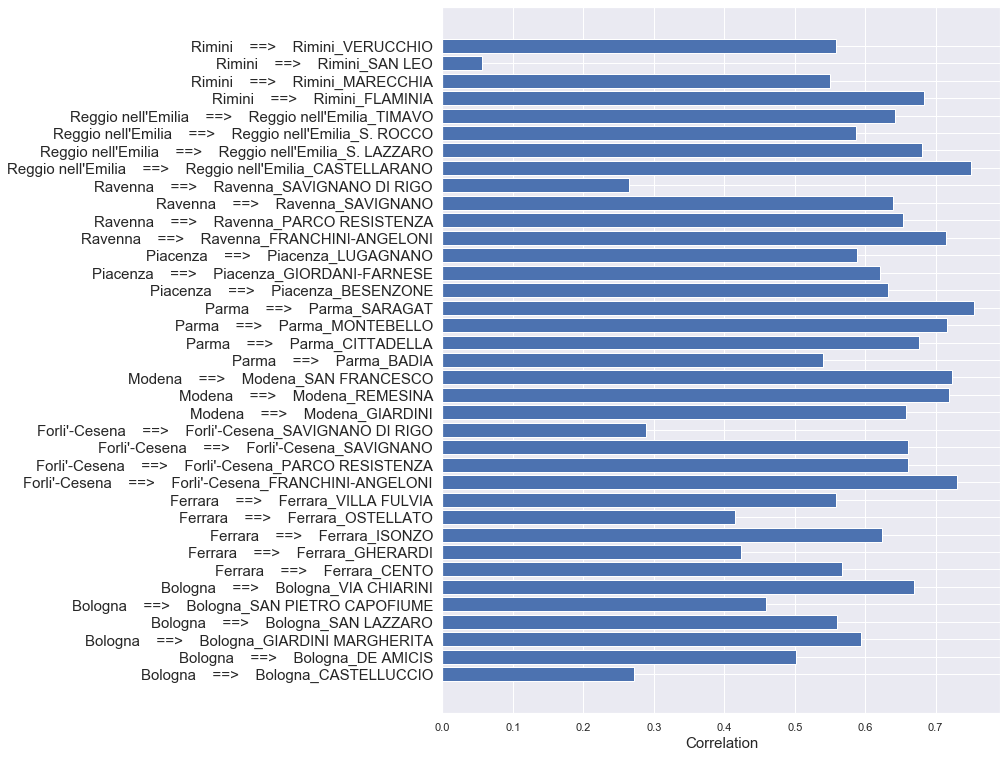

In [49]:
plt.figure(figsize = (10,13))
plt.barh(città_Stz,correlations)
plt.yticks(città_Stz, size = 15)
plt.xlabel('Correlation', size = 15)
plt.show()

### Correlazione per provincia

91 91
91 91
91 92
dopo diff 91 91
91 90
91 91
91 91
91 92
dopo diff 91 91
Bologna  ==> Pearson correlation, p-value (0.6512769055578588, 2.750288274425561e-12)


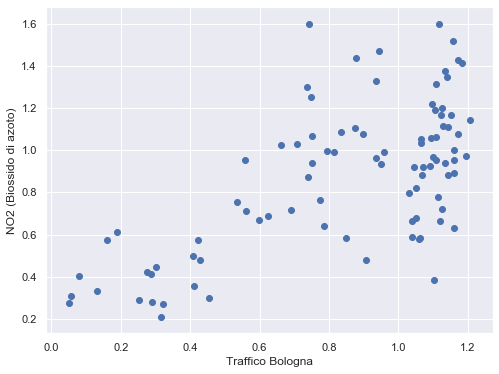

91 92
dopo diff 91 91
91 92
dopo diff 91 91
91 92
dopo diff 91 91
91 92
dopo diff 91 91
91 92
dopo diff 91 91
Ferrara  ==> Pearson correlation, p-value (0.5758775625672005, 2.3423879631303242e-09)


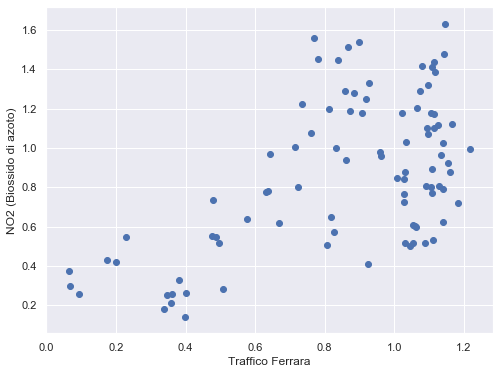

91 93
dopo diff 91 91
91 92
dopo diff 91 91
91 89
91 93
dopo diff 91 91
91 92
dopo diff 91 91
Forli'-Cesena  ==> Pearson correlation, p-value (0.7133459018767145, 2.1221438383971777e-15)


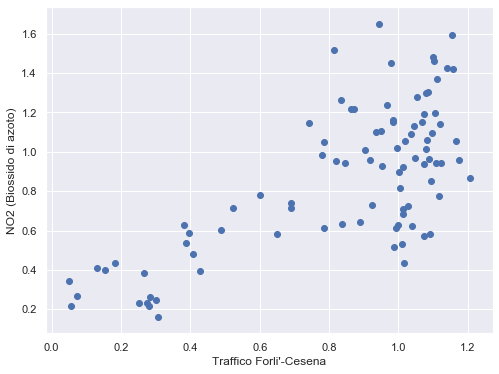

91 92
dopo diff 91 91
91 93
dopo diff 91 91
91 92
dopo diff 91 91
Modena  ==> Pearson correlation, p-value (0.7527626607993906, 7.674383010130045e-18)


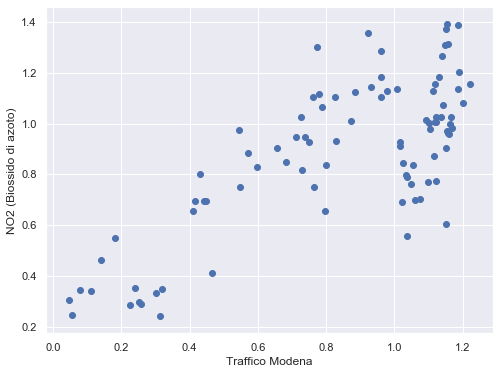

91 92
dopo diff 91 91
91 92
dopo diff 91 91
91 92
dopo diff 91 91
91 93
dopo diff 91 91
Parma  ==> Pearson correlation, p-value (0.7595493227384815, 2.6185266268881893e-18)


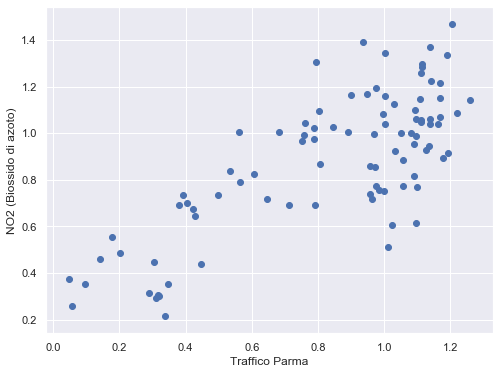

91 92
dopo diff 91 91
91 90
91 92
dopo diff 91 91
91 91
Piacenza  ==> Pearson correlation, p-value (0.6994238595992412, 1.2411813283895857e-14)


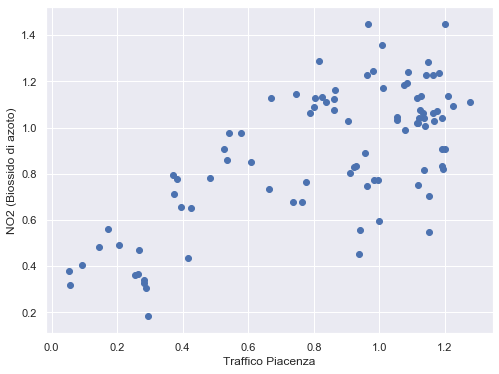

91 93
dopo diff 91 91
91 92
dopo diff 91 91
91 89
91 93
dopo diff 91 91
91 92
dopo diff 91 91
Ravenna  ==> Pearson correlation, p-value (0.712183281365153, 2.469223578198115e-15)


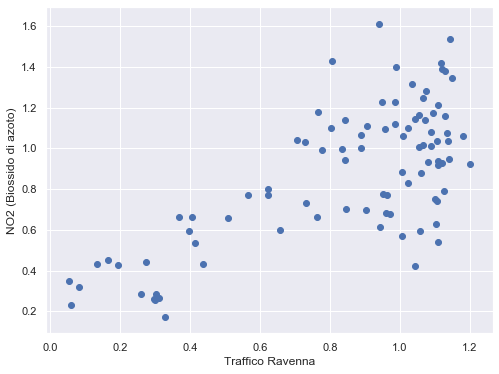

91 93
dopo diff 91 91
91 92
dopo diff 91 91
91 92
dopo diff 91 91
91 92
dopo diff 91 91
Reggio nell'Emilia  ==> Pearson correlation, p-value (0.7197632044086699, 9.072477982728596e-16)


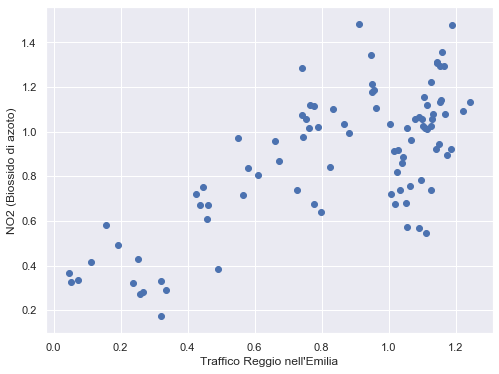

91 93
dopo diff 91 91
91 91
91 90
91 92
dopo diff 91 91
91 93
dopo diff 91 91
Rimini  ==> Pearson correlation, p-value (0.7232848000405148, 5.634109069416387e-16)


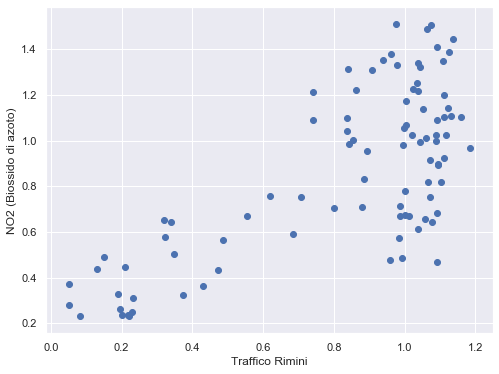

In [53]:
corr_per_prov= {}

prov_num = [0] * 91
for i, k in agg_by_province: 
    provincia_i = i
    df_provincia_i = provincie[provincia_i]
    agg_by_stz = df_provincia_i.groupby(by = ['Stazione'])
    città = k['Z.Totale'].values
    counter = 0
    for j, m in agg_by_stz:
        m = m.fillna(method='bfill')
        m = m.fillna(method='ffill')
        m = m.rolling(24).mean()
        m = m.fillna(method='bfill')
        m = m.fillna(method='ffill')
        m = m.iloc[::24,:]
        print(len(k), len(m))
        if len(m)> len(k):
            diff = len(m)-len(k)
            m = m[diff:]
        else : continue    
        print('dopo diff', len(k), len(m))    
        li = m['NO2 (Biossido di azoto)'].tolist()
        counter += 1
        prov_num = list(map(add, li, prov_num) )
         
    prov_num = np.array(prov_num)
    prov_num = prov_num/counter
    
    
    mean_prov = np.mean(prov_num[:70])
    normal_stz = prov_num / mean_prov
    corr = scipy.stats.pearsonr(città, normal_stz)
    print( provincia_i, ' ==> Pearson correlation, p-value '+str(corr))
    corr_per_prov[provincia_i] = corr
    plt.figure(figsize = (8,6))
    plt.scatter(città, normal_stz)
    plt.xlabel('Traffico '+ str(provincia_i))
    plt.ylabel('NO2 (Biossido di azoto)')
    plt.show()

In [54]:
corr_per_prov

{'Bologna': (0.6512769055578588, 2.750288274425561e-12),
 'Ferrara': (0.5758775625672005, 2.3423879631303242e-09),
 "Forli'-Cesena": (0.7133459018767145, 2.1221438383971777e-15),
 'Modena': (0.7527626607993906, 7.674383010130045e-18),
 'Parma': (0.7595493227384815, 2.6185266268881893e-18),
 'Piacenza': (0.6994238595992412, 1.2411813283895857e-14),
 'Ravenna': (0.712183281365153, 2.469223578198115e-15),
 "Reggio nell'Emilia": (0.7197632044086699, 9.072477982728596e-16),
 'Rimini': (0.7232848000405148, 5.634109069416387e-16)}

In [55]:
correlations_prov = []
città_prov = []

for k, v in corr_per_prov.items(): 
    #print(type(k), type(v))
    correlations_prov.append(v[0])
    città_prov.append(k)
correlations_prov 

[0.6512769055578588,
 0.5758775625672005,
 0.7133459018767145,
 0.7527626607993906,
 0.7595493227384815,
 0.6994238595992412,
 0.712183281365153,
 0.7197632044086699,
 0.7232848000405148]

Text(0.5, 0, 'Correlazione')

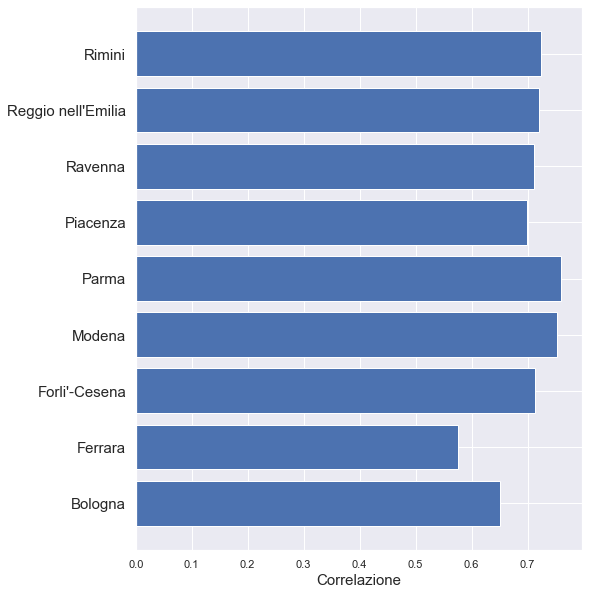

In [56]:
plt.figure(figsize = (8,10))
plt.barh(città_prov,correlations_prov)
plt.yticks(città_prov, size = 15)
plt.xlabel('Correlazione', size = 15)

In [57]:
l1 = [1, 2, 3]
l2 = [3, 2, 4]
s = list(map(add, l1, l2))
s

[4, 4, 7]

In [58]:
a = np.array([1, 2, 3, 4, 5])
b = a/2
b

array([0.5, 1. , 1.5, 2. , 2.5])